# **✏️ Tugas Pratikum**

Klasterisasi Data Nasabah Kartu Kredit

1. Buatlah _scatterplot_ berdasarkan dataset menggunakan dua variabel, yaitu `Avg_Credit_Limit` dan `Total_credit_card`. Apakah sebaran data dapat dikatakan linier?
2. Buatlah model klasterisasi dengan menggunakan model `K-Means`. Tentukan jumlah `k` yang terbaik dengan menggunakan _**elbow method**_. Lengkapi analisis Anda dengan _linechart_ dan hasil analisis mengapa Anda memilih nilai tersebut.
3. Gambarkan hasil klasterisasi dengan model `K-Means` dengan menggunakan _scatterplot_.
4. Buatlah model klasterisasi dengan menggunakan **`DBSCAN`** dengan seluruh variabel yang dapat digunakan.
5. Tentukan jumlah `k` yang terbaik dengan menggunakan _**elbow method**_. Lengkapi analisis Anda dengan _linechart_ dan hasil analisis mengapa Anda memilih nilai tersebut.
6. Tentukan nilai _`silhouette score`_ dan `DBI` dari model `DBSCAN`.

In [27]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score # type: ignore
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
# --- Memuat Dataset ---
# Pastikan file 'CC_Customer_Dataset.csv' berada di direktori yang sama
# atau berikan path lengkap ke file tersebut.
try:
    df = pd.read_csv('../data/CC_Customer_Dataset.csv') # type: ignore
except FileNotFoundError:
    print("File 'CC_Customer_Dataset.csv' tidak ditemukan.")
    # Hentikan eksekusi jika file tidak ada
    exit()

# Menghapus kolom yang tidak relevan untuk klasterisasi
X = df.drop(['Sl_No', 'Customer Key'], axis=1)

# --- Normalisasi Data ---
# Menskalakan data agar setiap fitur memiliki bobot yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # type: ignore

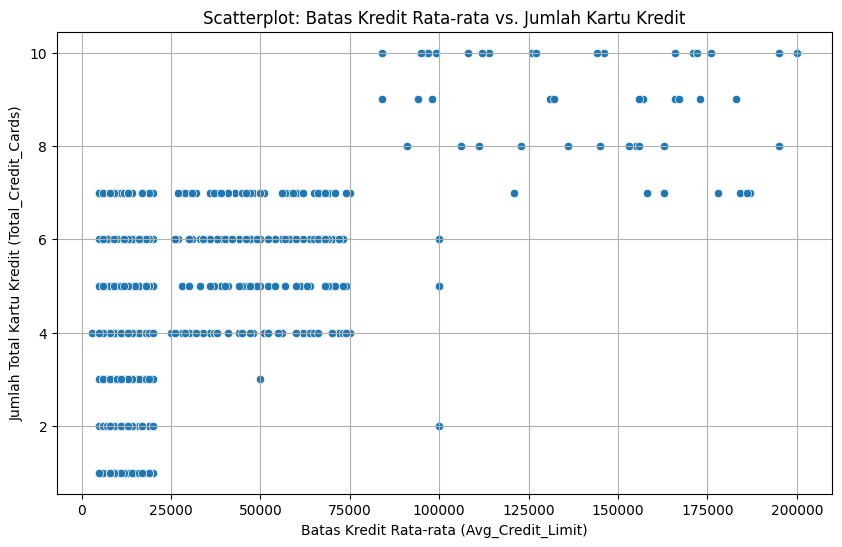

Jawaban 1: Dari scatterplot, sebaran data tidak dapat dikatakan linier.



In [29]:
# --- 1. Scatterplot Awal ---
plt.figure(figsize=(10, 6)) # type: ignore
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards')
plt.title('Scatterplot: Batas Kredit Rata-rata vs. Jumlah Kartu Kredit') # type: ignore
plt.xlabel('Batas Kredit Rata-rata (Avg_Credit_Limit)') # type: ignore
plt.ylabel('Jumlah Total Kartu Kredit (Total_Credit_Cards)') # type: ignore
plt.grid(True) # type: ignore
plt.show() # type: ignore
print("Jawaban 1: Dari scatterplot, sebaran data tidak dapat dikatakan linier.\n")

Menjalankan Elbow Method untuk K-Means...


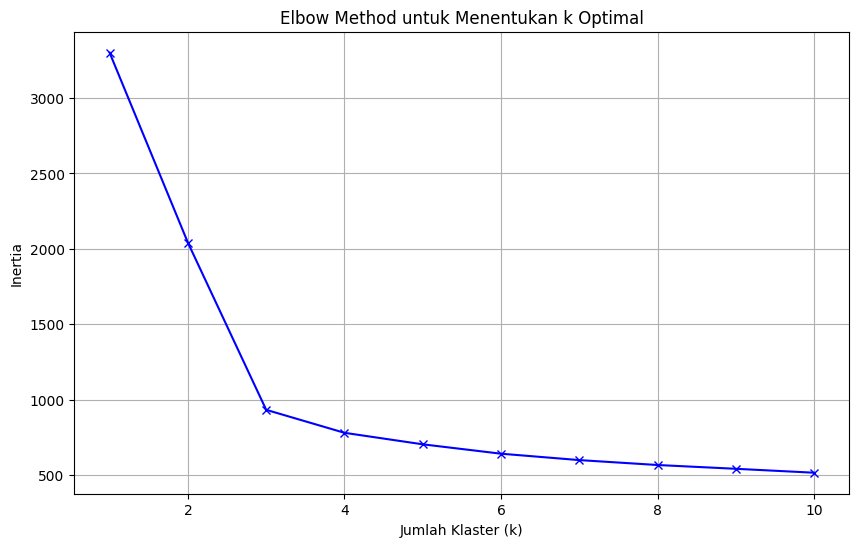

In [30]:
# --- 2 & 5. Elbow Method untuk Menentukan k Optimal (K-Means) ---
print("Menjalankan Elbow Method untuk K-Means...")
inertia = []
K = range(1, 11)
for k in K:
    # Menggunakan n_init=10 untuk menghindari hasil yang suboptimal karena inisialisasi acak
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_scaled)
    inertia.append(kmeans_model.inertia_) # type: ignore

# Plot Elbow Method
plt.figure(figsize=(10, 6)) # type: ignore
plt.plot(K, inertia, 'bx-') # type: ignore
plt.xlabel('Jumlah Klaster (k)') # type: ignore
plt.ylabel('Inertia') # type: ignore
plt.title('Elbow Method untuk Menentukan k Optimal') # type: ignore
plt.grid(True) # type: ignore
plt.show() # type: ignore

In [31]:
# Analisis Elbow Method
# Berdasarkan plot, "siku" yang paling jelas terlihat pada k=3.
optimal_k = 3
print(f"Jawaban 2 & 5: Nilai k terbaik yang dipilih berdasarkan Elbow Method adalah {optimal_k}.\n")

Jawaban 2 & 5: Nilai k terbaik yang dipilih berdasarkan Elbow Method adalah 3.



Membuat model K-Means dengan k=3...


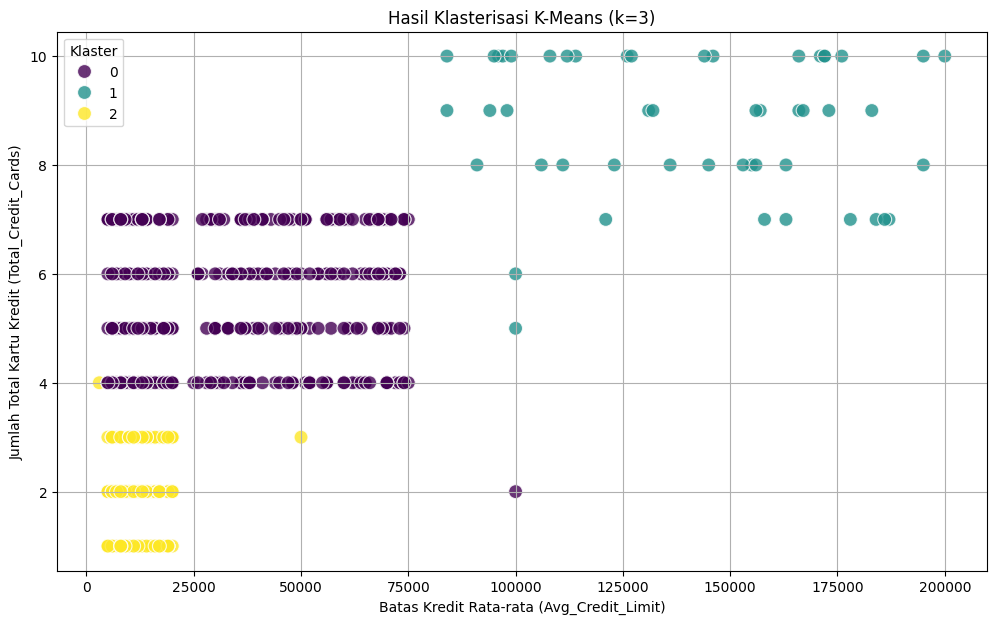

In [32]:
# --- 3. Model K-Means dan Visualisasi Hasil Klasterisasi ---
print(f"Membuat model K-Means dengan k={optimal_k}...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil K-Means
plt.figure(figsize=(12, 7)) # type: ignore
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='KMeans_Cluster', palette='viridis', s=100, alpha=0.8)
plt.title(f'Hasil Klasterisasi K-Means (k={optimal_k})') # type: ignore
plt.xlabel('Batas Kredit Rata-rata (Avg_Credit_Limit)') # type: ignore
plt.ylabel('Jumlah Total Kartu Kredit (Total_Credit_Cards)') # type: ignore
plt.legend(title='Klaster') # type: ignore
plt.grid(True) # type: ignore
plt.show() # type: ignore

Membuat model DBSCAN...


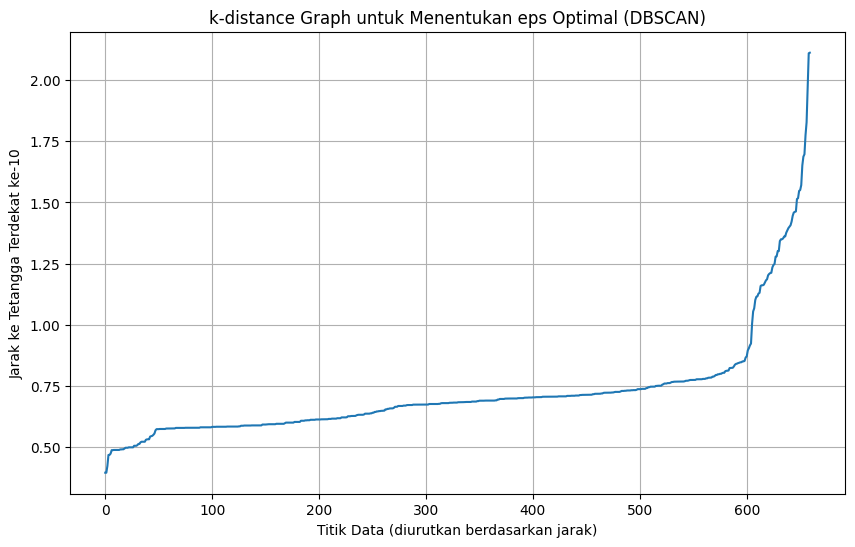

Jawaban 4: Model DBSCAN telah dibuat dengan eps=2.0 dan min_samples=10.



In [33]:
# --- 4. Model Klasterisasi DBSCAN ---
print("Membuat model DBSCAN...")
# Menentukan nilai 'eps' yang optimal menggunakan k-distance graph
# min_samples biasanya diatur menjadi 2 * jumlah_fitur
min_samples = X_scaled.shape[1] * 2
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(10, 6)) # type: ignore
plt.plot(sorted_distances) # type: ignore
plt.xlabel("Titik Data (diurutkan berdasarkan jarak)") # type: ignore
plt.ylabel(f"Jarak ke Tetangga Terdekat ke-{min_samples}") # type: ignore
plt.title("k-distance Graph untuk Menentukan eps Optimal (DBSCAN)") # type: ignore
plt.grid(True) # type: ignore
plt.show() # type: ignore

# Dari plot, titik "lutut" (knee) berada di sekitar 2.0. Ini nilai eps yang baik.
optimal_eps = 2.0

# Membuat model DBSCAN dengan parameter yang telah ditentukan
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
print(f"Jawaban 4: Model DBSCAN telah dibuat dengan eps={optimal_eps} dan min_samples={min_samples}.\n")

In [34]:
# --- 6. Evaluasi Model DBSCAN ---
print("Mengevaluasi model DBSCAN...")
labels = df['DBSCAN_Cluster']
unique_labels = set(labels)

print("Jawaban 6:")
# Hanya hitung skor jika ada lebih dari 1 klaster
if len(unique_labels) > 1:
    silhouette = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    
    # Cetak hasil dengan format angka
    print(f"  - Silhouette Score dari model DBSCAN: {silhouette:.3f}")
    print(f"  - Davies-Bouldin Index (DBI) dari model DBSCAN: {dbi:.3f}\n")
else:
    # Cetak pesan teks jika skor tidak bisa dihitung
    silhouette_msg = "Tidak dapat dihitung (hanya satu klaster ditemukan)."
    dbi_msg = "Tidak dapat dihitung (hanya satu klaster ditemukan)."
    
    print(f"  - Silhouette Score dari model DBSCAN: {silhouette_msg}")
    print(f"  - Davies-Bouldin Index (DBI) dari model DBSCAN: {dbi_msg}\n")

# Menampilkan jumlah klaster yang ditemukan oleh DBSCAN
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(labels == -1)
print(f"DBSCAN menemukan {n_clusters_dbscan} klaster dan {n_noise} titik noise.")
print("Distribusi klaster DBSCAN:")
print(df['DBSCAN_Cluster'].value_counts())

Mengevaluasi model DBSCAN...
Jawaban 6:
  - Silhouette Score dari model DBSCAN: Tidak dapat dihitung (hanya satu klaster ditemukan).
  - Davies-Bouldin Index (DBI) dari model DBSCAN: Tidak dapat dihitung (hanya satu klaster ditemukan).

DBSCAN menemukan 1 klaster dan 0 titik noise.
Distribusi klaster DBSCAN:
DBSCAN_Cluster
0    660
Name: count, dtype: int64
